<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/ModelingSleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



cli          (3.6.3 -> 3.6.4     ) [CRAN]
numDeriv     (NA    -> 2016.8-1.1) [CRAN]
R6           (2.5.1 -> 2.6.0     ) [CRAN]
matrixStats  (NA    -> 1.5.0     ) [CRAN]
distribut... (NA    -> 0.5.0     ) [CRAN]
tensorA      (NA    -> 0.36.2.1  ) [CRAN]
checkmate    (NA    -> 2.3.2     ) [CRAN]
abind        (NA    -> 1.4-8     ) [CRAN]
posterior    (NA    -> 1.6.0     ) [CRAN]


Installing 9 packages: cli, numDeriv, R6, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpdYT4HS/remotes1a8496cba7e/stan-dev-cmdstanr-e5086f7/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.36.0

* Installing CmdStan v2.36.0 in /root/.cmdstan/cmdstan-2.36.0

* Downloading cmdstan-2.36.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



g++ -Wno-deprecated-declarations -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -MT bin/cmdstan/stansummary.o -MM -E -MG -MP -MF src/cmdstan/stansummary.d src/cmdstan/stansummary.cpp
cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sund

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.36.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0



[1] "2.36.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpdYT4HS/remotes1a837a39ad1/rmcelreath-rethinking-ac1b3b2/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.42.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.42)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.1089547,0.2153253,-0.4344166,0.2237697,1.001092,281.6113
b,0.8520932,0.2481956,0.4583229,1.2435820,1.000572,426.1925


# Introduction
Here, we'll build a model of sleep in rodents.  We'll start with a basic model, that uses some assumptions that are less than ideal, then iterate on the model with some complexities that should make it a better model for sleep.  

First, some important facts about sleep and sleep in rodents:
*   In a lab envrionment, rodents usually live in a light-controlled environment; the lights on are for 12 consecutive hours and then off for 12 consecutive hours.  Thus, each 24-h day consists of a *Light* phase and a *Dark* phase.
*   There are 2 basic vigilance states, WAKE and SLEEP.  Within SLEEP, there are 2 basic types, rapid-eye-movement sleep (REMS) and non-REMS (NREMS).  NREMS usually makes up about 80-90% of sleep, while REMS makes up the remainder.
*   Sleep is a rhythmic behavior.  Over the course of a day, rodents exhibit both WAKE and SLEEP, including NREMS and REMS, throughout the entire day.  However, they are **nocturnal**, which means that most of their sleep occurs during the Light phase.  Within each 12-h phase, smaller rhythms are present.  For instance, the propensity for SLEEP may rise and fall over 3-h and 6-h periods.
*  REMS is usually all but absent in the beginning of a 12-h phase, but becomes more prevalent towards the end.

# The Data
Before we can model, we need to create some data.  We'll imagine 2 groups of rats: one group received an injection of a substance *S* that we think may affect sleep, and the other group only received a placebo injection  (Later, instead of groups, we'll imagine that each rat is treated with both placebo and substance S).

DISCLAIMER: Sleep is a very complex and architectured process.  The data created here will only account for some basic features of that complex architecture.  

In [7]:
n_A <- 10 # Number of rats in Group A
n_B <- 10 # Number of rats in Group B

NREMS_A <- data.frame(#"Blk0" = rep(0, n_A),
                      "Blk1" = rgamma(n = n_A, shape=144, rate=2.4) * (1/21), # 1h NREMS in 0-6h
                      "Blk2" = rgamma(n = n_A, shape=144, rate=2.4) * (2/21),
                      "Blk3" = rgamma(n = n_A, shape=144, rate=2.4) * (3/21),
                      "Blk4" = rgamma(n = n_A, shape=144, rate=2.4) * (4/21),
                      "Blk5" = rgamma(n = n_A, shape=144, rate=2.4) * (5/21),
                      "Blk6" = rgamma(n = n_A, shape=144, rate=2.4) * (6/21),

                      "Blk7" = rgamma(n=n_A, shape=576, rate=4.8) * (1/21), # 2h NREMS in 6-12h
                      "Blk8" = rgamma(n=n_A, shape=576, rate=4.8) * (2/21),
                      "Blk9" = rgamma(n=n_A, shape=576, rate=4.8) * (3/21),
                      "Blk10" = rgamma(n=n_A, shape=576, rate=4.8) * (4/21),
                      "Blk11" = rgamma(n=n_A, shape=576, rate=4.8) * (5/21),
                      "Blk12" = rgamma(n=n_A, shape=576, rate=4.8) * (6/21),

                      "Blk13" = rgamma(n=n_A, shape=1296, rate=7.2) * 6/21, # 3h NREMS in 12-18h
                      "Blk14" = rgamma(n=n_A, shape=1296, rate=7.2) * 5/21,
                      "Blk15" = rgamma(n=n_A, shape=1296, rate=7.2) * 4/21,
                      "Blk16" = rgamma(n=n_A, shape=1296, rate=7.2) * 3/21,
                      "Blk17" = rgamma(n=n_A, shape=1296, rate=7.2) * 2/21,
                      "Blk18" = rgamma(n=n_A, shape=1296, rate=7.2) * 1/21,

                      "Blk19" = rgamma(n=n_A, shape=900, rate=6.0) * (6/21), # 2.5h NREMS in 18-24h
                      "Blk20" = rgamma(n=n_A, shape=900, rate=6.0) * (5/21),
                      "Blk21" = rgamma(n=n_A, shape=900, rate=6.0) * (4/21),
                      "Blk22" = rgamma(n=n_A, shape=900, rate=6.0) * (3/21),
                      "Blk23" = rgamma(n=n_A, shape=900, rate=6.0) * (2/21),
                      "Blk24" = rgamma(n=n_A, shape=900, rate=6.0) * (1/21))

REMS_A <- data.frame("Blk1" = (60 - NREMS_A$Blk1)*.01,
                     "Blk2" = (60 - NREMS_A$Blk1)*.01,
                     "Blk3" = (60 - NREMS_A$Blk1)*.01,
                     "Blk4" = (60 - NREMS_A$Blk1)*.01,
                     "Blk5" = (60 - NREMS_A$Blk1)*.01,
                     "Blk6" = (60 - NREMS_A$Blk1)*.01,

                     "Blk7" = (60 - NREMS_A$Blk1)*.05,
                     "Blk8" = (60 - NREMS_A$Blk1)*.05,
                     "Blk9" = (60 - NREMS_A$Blk1)*.05,
                     "Blk10" = (60 - NREMS_A$Blk1)*.05,
                     "Blk11" = (60 - NREMS_A$Blk1)*.05,
                     "Blk12" = (60 - NREMS_A$Blk1)*.05,

                     "Blk13" = (60 - NREMS_A$Blk1)*.05,
                     "Blk14" = (60 - NREMS_A$Blk1)*.05,
                     "Blk15" = (60 - NREMS_A$Blk1)*.05,
                     "Blk16" = (60 - NREMS_A$Blk1)*.05,
                     "Blk17" = (60 - NREMS_A$Blk1)*.05,
                     "Blk18" = (60 - NREMS_A$Blk1)*.05,

                     "Blk19" = (60 - NREMS_A$Blk1)*.1,
                     "Blk20" = (60 - NREMS_A$Blk1)*.1,
                     "Blk21" = (60 - NREMS_A$Blk1)*.1,
                     "Blk22" = (60 - NREMS_A$Blk1)*.1,
                     "Blk23" = (60 - NREMS_A$Blk1)*.1,
                     "Blk24" = (60 - NREMS_A$Blk1)*.1)


NREMS_B <- data.frame(#"Blk0" = rep(0, n_B),
                      "Blk1" = (rgamma(n = n_B, shape=144, rate=2.4) + rnorm(n=n_B, mean=30, sd=6)) * (1/21), # Similar to NREMS_A, but with the effect of S added
                      "Blk2" = (rgamma(n = n_B, shape=144, rate=2.4) + rnorm(n=n_B, mean=30, sd=6)) * (2/21),
                      "Blk3" = (rgamma(n = n_B, shape=144, rate=2.4) + rnorm(n=n_B, mean=30, sd=6)) * (3/21),
                      "Blk4" = (rgamma(n = n_B, shape=144, rate=2.4) + rnorm(n=n_B, mean=30, sd=6)) * (4/21),
                      "Blk5" = (rgamma(n = n_B, shape=144, rate=2.4) + rnorm(n=n_B, mean=30, sd=6)) * (5/21),
                      "Blk6" = (rgamma(n = n_B, shape=144, rate=2.4) + rnorm(n=n_B, mean=30, sd=6)) * (6/21),

                      "Blk7" = (rgamma(n=n_B, shape=576, rate=4.8) + rnorm(n=n_B, mean=20, sd=5)) * (1/21),
                      "Blk8" = (rgamma(n=n_B, shape=576, rate=4.8) + rnorm(n=n_B, mean=20, sd=5)) * (2/21),
                      "Blk9" = (rgamma(n=n_B, shape=576, rate=4.8) + rnorm(n=n_B, mean=20, sd=5)) * (3/21),
                      "Blk10" = (rgamma(n=n_B, shape=576, rate=4.8) + rnorm(n=n_B, mean=20, sd=5)) * (4/21),
                      "Blk11" = (rgamma(n=n_B, shape=576, rate=4.8) + rnorm(n=n_B, mean=20, sd=5)) * (5/21),
                      "Blk12" = (rgamma(n=n_B, shape=576, rate=4.8) + rnorm(n=n_B, mean=20, sd=5)) * (6/21),

                      "Blk13" = (rgamma(n=n_B, shape=1296, rate=7.2) + rnorm(n=n_B, mean=10, sd=4)) * (6/21),
                      "Blk14" = (rgamma(n=n_B, shape=1296, rate=7.2) + rnorm(n=n_B, mean=10, sd=4)) * (5/21),
                      "Blk15" = (rgamma(n=n_B, shape=1296, rate=7.2) + rnorm(n=n_B, mean=10, sd=4)) * (4/21),
                      "Blk16" = (rgamma(n=n_B, shape=1296, rate=7.2) + rnorm(n=n_B, mean=10, sd=4)) * (3/21),
                      "Blk17" = (rgamma(n=n_B, shape=1296, rate=7.2) + rnorm(n=n_B, mean=10, sd=4)) * (2/21),
                      "Blk18" = (rgamma(n=n_B, shape=1296, rate=7.2) + rnorm(n=n_B, mean=10, sd=4)) * (1/21),

                      "Blk19" = (rgamma(n=n_B, shape=900, rate=6.0) + rnorm(n=n_B, mean=5, sd=3)) * (6/21),
                      "Blk20" = (rgamma(n=n_B, shape=900, rate=6.0) + rnorm(n=n_B, mean=5, sd=3)) * (5/21),
                      "Blk21" = (rgamma(n=n_B, shape=900, rate=6.0) + rnorm(n=n_B, mean=5, sd=3)) * (4/21),
                      "Blk22" = (rgamma(n=n_B, shape=900, rate=6.0) + rnorm(n=n_B, mean=5, sd=3)) * (3/21),
                      "Blk23" = (rgamma(n=n_B, shape=900, rate=6.0) + rnorm(n=n_B, mean=5, sd=3)) * (2/21),
                      "Blk24" = (rgamma(n=n_B, shape=900, rate=6.0) + rnorm(n=n_B, mean=5, sd=3)) * (1/21))

REMS_B <- data.frame("Blk1" = (60 - NREMS_B$Blk1)*.01,
                     "Blk2" = (60 - NREMS_B$Blk1)*.01,
                     "Blk3" = (60 - NREMS_B$Blk1)*.01,
                     "Blk4" = (60 - NREMS_B$Blk1)*.01,
                     "Blk5" = (60 - NREMS_B$Blk1)*.01,
                     "Blk6" = (60 - NREMS_B$Blk1)*.01,

                     "Blk7" = (60 - NREMS_B$Blk1)*.05,
                     "Blk8" = (60 - NREMS_B$Blk1)*.05,
                     "Blk9" = (60 - NREMS_B$Blk1)*.05,
                     "Blk10" = (60 - NREMS_B$Blk1)*.05,
                     "Blk11" = (60 - NREMS_B$Blk1)*.05,
                     "Blk12" = (60 - NREMS_B$Blk1)*.05,

                     "Blk13" = (60 - NREMS_B$Blk1)*.05,
                     "Blk14" = (60 - NREMS_B$Blk1)*.05,
                     "Blk15" = (60 - NREMS_B$Blk1)*.05,
                     "Blk16" = (60 - NREMS_B$Blk1)*.05,
                     "Blk17" = (60 - NREMS_B$Blk1)*.05,
                     "Blk18" = (60 - NREMS_B$Blk1)*.05,

                     "Blk19" = (60 - NREMS_B$Blk1)*.1,
                     "Blk20" = (60 - NREMS_B$Blk1)*.1,
                     "Blk21" = (60 - NREMS_B$Blk1)*.1,
                     "Blk22" = (60 - NREMS_B$Blk1)*.1,
                     "Blk23" = (60 - NREMS_B$Blk1)*.1,
                     "Blk24" = (60 - NREMS_B$Blk1)*.1)

m_NREMS <- length(NREMS_A) # number of measurements for NREMS.
m_REMS <- length(REMS_A) # number of measurements for REMS.

So we have NREMS and REMS for both groups of rats for each of 24 consecutive hours.  In the first part of this project, we'll focus primarily on NREMS.

There's something weird with this type of data.  For each time block, the amount of NREMS represented in that data point has been accumulated over the preceeding time block.  So even though the data is discrete like this:

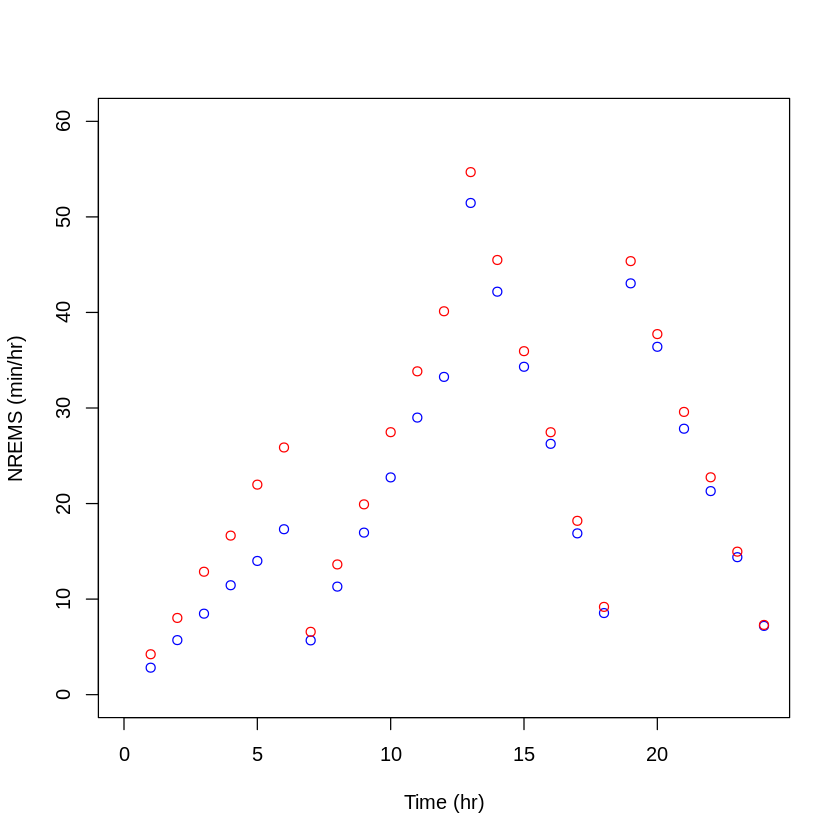

In [8]:
plot(colMeans(NREMS_A), ylim=c(0,60), xlim=c(0,24), col="blue", xlab="Time (hr)", ylab="NREMS (min/hr)")
points(colMeans(NREMS_B), col="red")

It's often thought about and presented as a continuous function like this:

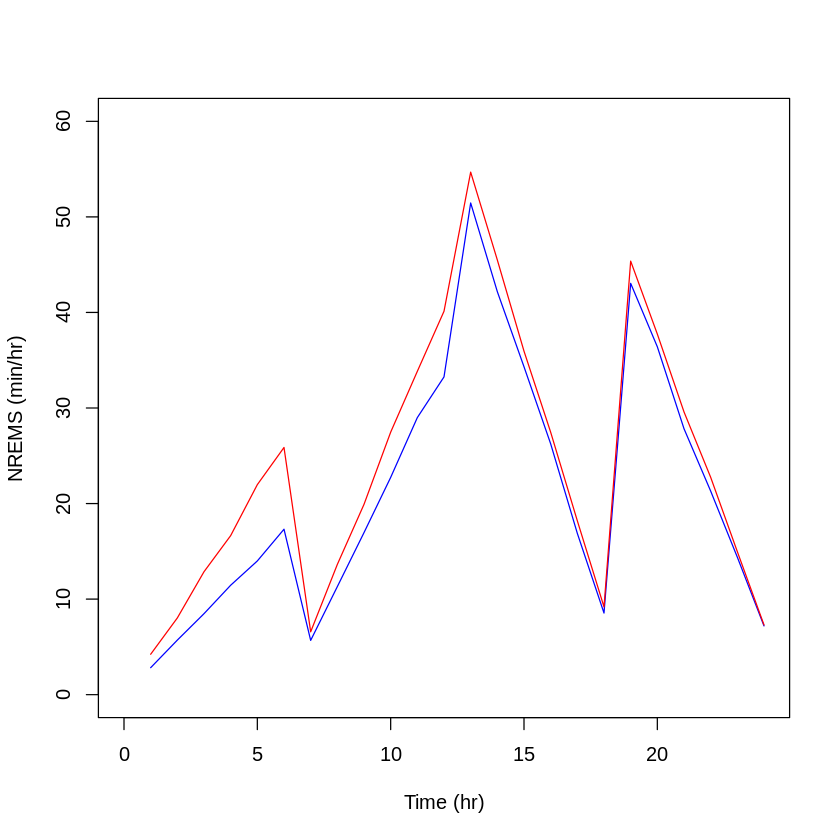

In [9]:
plot(colMeans(NREMS_A), type="l", ylim=c(0,60), xlim=c(0,24), col="blue", xlab="Time (hr)", ylab="NREMS (min/hr)")
lines(colMeans(NREMS_B), col="red")

But in this case, we're forced to think about the y-axis value of a line as being something like "NREMS *propensity*".  Why? Take any 2 points along a curve, say 13 hr 0 min and 13 h 1 min; this representation would say that some 100 minutes of NREMS accumulated in 1 min...which is nonsensical.  So let's put this on a scale that fixes this, by working with accumulated NREMS.

In [10]:
NREMS_A_cuml <- NREMS_A
for(i in 2:ncol(NREMS_A)) {
  NREMS_A_cuml[,i] <- NREMS_A_cuml[,i] + NREMS_A_cuml[,i-1]
}

REMS_A_cuml <- REMS_A
for(i in 2:ncol(REMS_A)) {
  REMS_A_cuml[,i] <- REMS_A_cuml[,i] + REMS_A_cuml[,i-1]
}

NREMS_B_cuml <- NREMS_B
for(i in 2:ncol(NREMS_B)) {
  NREMS_B_cuml[,i] <- NREMS_B_cuml[,i] + NREMS_B_cuml[,i-1]
}

REMS_B_cuml <- REMS_B
for(i in 2:ncol(REMS_B)) {
  REMS_B_cuml[,i] <- REMS_B_cuml[,i] + REMS_B_cuml[,i-1]
}

Now it makes sense to treat NREMS as a continuous function.

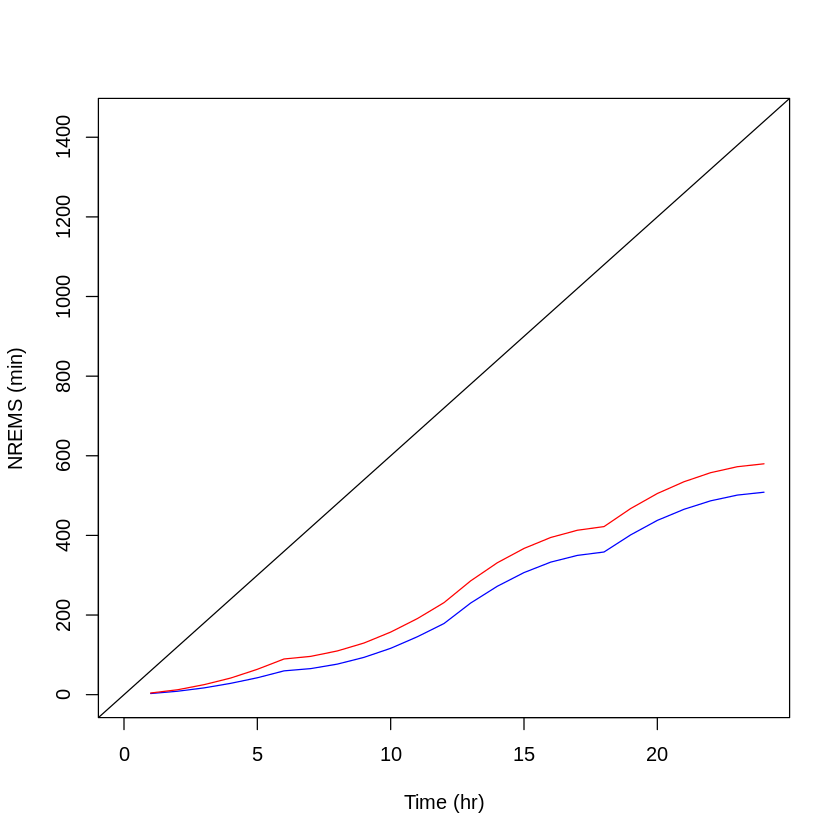

In [11]:
plot(colMeans(NREMS_A_cuml), type="l", ylim=c(0,1440), xlim=c(0,24), col="blue", xlab="Time (hr)", ylab="NREMS (min)")
lines(colMeans(NREMS_B_cuml), col="red")
abline(a=0, b=1440/24)

(the black diagnol line represents the total time elapsed).

Now, the difference between any two timepoints *does* represent accumualted NREMS.

Now I'm just going to repackage the data into a convenient-to-use dataframe.

In [12]:
TotalPreviousSleep_A <- as.numeric(unlist(cbind(0, NREMS_A_cuml[,1:23])) + unlist(cbind(0, REMS_A_cuml[,1:23])))
TotalPreviousSleep_B <- as.numeric(unlist(cbind(0, NREMS_B_cuml[,1:23])) + unlist(cbind(0, REMS_B_cuml[,1:23])))

Sleep_All <- data.frame("Subject" = rep(LETTERS[1:n_A], 2*m_NREMS),
                        "NREMS" = c(as.numeric(unlist(NREMS_A_cuml)), as.numeric(unlist(NREMS_B_cuml))),
                        "REMS" = c(as.numeric(unlist(REMS_A_cuml)), as.numeric(unlist(REMS_B_cuml))),
                        "TotalPreviousSleep" = c(TotalPreviousSleep_A, TotalPreviousSleep_B),
                        "Group" = c(rep("A", (m_NREMS)*n_A), c(rep("B", (m_NREMS)*n_B))),
                        "Block" = c(rep(1:24, each=n_A), c(rep(1:24, each=n_B))))

Sleep_All$treatment <- ifelse(test = Sleep_All$Group=="A",
                              yes = FALSE,
                              no = TRUE)
Sleep_All$minute <- Sleep_All$Block*60

head(Sleep_All)

,Subject,NREMS,REMS,TotalPreviousSleep,Group,Block,treatment,minute
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<lgl>,<dbl>
1,A,2.886033,0.5711397,0,A,1,FALSE,60
2,B,2.783822,0.5721618,0,A,1,FALSE,60
3,C,3.008518,0.5699148,0,A,1,FALSE,60
4,D,2.644544,0.5735546,0,A,1,FALSE,60
5,E,2.907779,0.5709222,0,A,1,FALSE,60
6,F,2.408271,0.5759173,0,A,1,FALSE,60


# The Models

## Model 1
We'll start by modeling only NREMS.  We'll assume that NREMS is normally distributed.  This is not a great assumption, and we'll change it in later iterations, but it'll help get us started.

Since NREMS follows a type of continuous rhythm throughout the day, we'll first use splines to model it.

In [13]:
knot_list <- c(360, 720, 1080)
num_knots <- length(knot_list)
knot_degree <- 3

 'bs' num [1:24, 1:7] 1 0.512 0.216 0.064 0.008 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:7] "1" "2" "3" "4" ...
 - attr(*, "degree")= int 3
 - attr(*, "knots")= num [1:3] 360 720 1080
 - attr(*, "Boundary.knots")= num [1:2] 60 1440
 - attr(*, "intercept")= logi TRUE


1,2,3,4,5,6,7
1.000,0.00000000,0.00000000,0.000000000,0.0000000000,0,0
0.512,0.43874380,0.04818668,0.001069519,0.0000000000,0,0
0.216,0.60813223,0.16731162,0.008556150,0.0000000000,0,0
0.064,0.58790083,0.31922217,0.028877005,0.0000000000,0,0
0.008,0.45778512,0.46576568,0.068449198,0.0000000000,0,0
0.000,0.29752066,0.56878950,0.133689840,0.0000000000,0,0
0.000,0.17217631,0.59958543,0.227466660,0.0007716049,0,0
0.000,0.08815427,0.56722303,0.338449858,0.0061728395,0,0
0.000,0.03719008,0.49021633,0.451760250,0.0208333333,0,0
0.000,0.01101928,0.38707935,0.552518651,0.0493827160,0,0


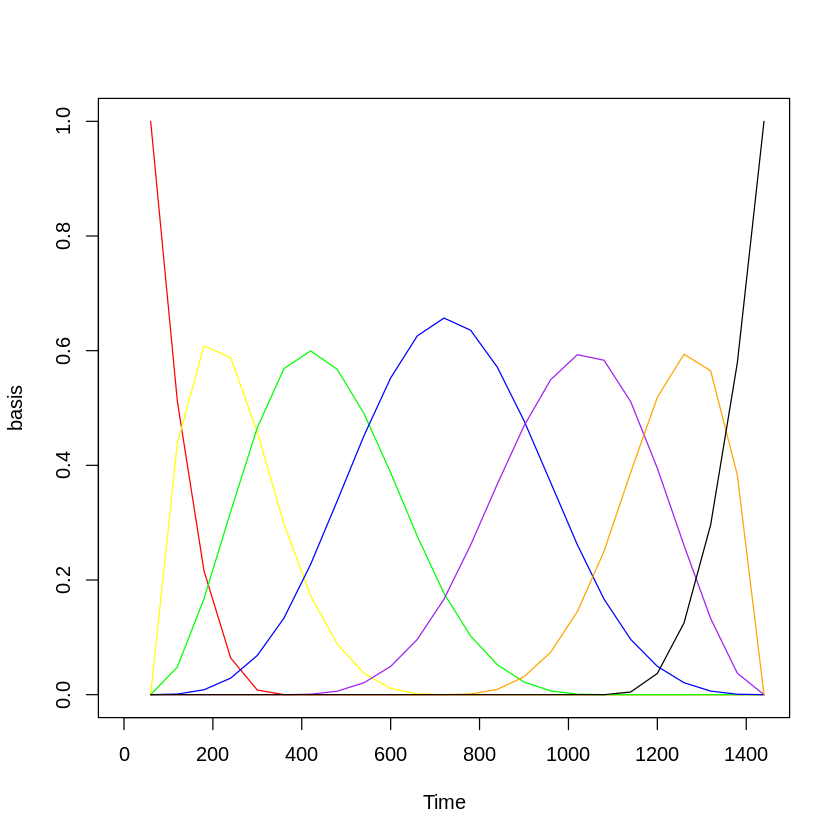

In [14]:
library(splines)

B <- bs(unique(Sleep_All$minute),
        knots=knot_list,
        degree=knot_degree,
        intercept=TRUE)

str(B)
head(B, 10)

cols <- c("red", "yellow", "green", "blue", "purple", "orange", "black")
plot(NULL, xlim=c(0, 1440), ylim=c(0,1), xlab="Time", ylab="basis")
for(i in 1:(ncol(B))){
 lines(unique(Sleep_All$minute), B[,i], col=cols[i])
}

In [15]:
B1 <- B[,1]
B2 <- B[,2]
B3 <- B[,3]
B4 <- B[,4]
B5 <- B[,5]
B6 <- B[,6]
B7 <- B[,7]

NREMS_model_1 <- quap(
  alist(
    NREMS ~ dnorm(mu, sigma),
      mu <- #a[treatment] +
            b_time[treatment]*time + # provides a time-dependent intercept
            #B1*w1[treatment] +
            #B2*w2[treatment] +
            B3*w3[treatment] +
            B4*w4[treatment] +
            B5*w5[treatment] +
            #B6*w6[treatment] +
            B7*w7[treatment],
        #a[treatment] <- b_time[treatment]*time,
          b_time[treatment] ~ dnorm(30, 10),
        #w1[treatment] ~ dnorm(30, 10),
        #w2[treatment] ~ dnorm(30, 10),
        w3[treatment] ~ dnorm(30, 10),
        w4[treatment] ~ dnorm(30, 10),
        w5[treatment] ~ dnorm(30, 10),
        #w6[treatment] ~ dnorm(30, 10),
        w7[treatment] ~ dnorm(30, 10),
        #w8[treatment] ~ dnorm(30, 10),
        #w9[treatment] ~ dnorm(30, 10),
      sigma ~ dexp(1)
  ), data=list(NREMS=Sleep_All$NREMS,
               treatment=as.integer(Sleep_All$treatment)+1,
               time=Sleep_All$Block,
               B3=B3, B4=B4, B5=B5, B7=B7),
     start=list(w3=1, w4=1, w5=1, w7=1)
)

precis(NREMS_model_1, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
w3[1],-7.548860,8.1084109,-20.507667,5.4099467
w3[2],-5.025796,8.0857886,-17.948448,7.8968556
w4[1],-12.568195,7.6549633,-24.802305,-0.3340854
w4[2],-11.006979,7.6505505,-23.234036,1.2200783
w5[1],-7.577740,8.1636457,-20.624823,5.4693424
w5[2],-5.591870,8.1456210,-18.610146,7.4264055
w7[1],4.038119,7.9887654,-8.729471,16.8057090
w7[2],4.608214,7.9807654,-8.146591,17.3630186
b_time[1],20.193089,0.2682035,19.764448,20.6217297


In [16]:
post <- extract.samples(NREMS_model_1)
str(post)

List of 6
 $ sigma : num [1:10000] 43.8 46.1 41.1 42.8 44.3 ...
 $ w3    : num [1:10000, 1:2] -2.84 4.61 -10.02 -6.93 -9.25 ...
 $ w4    : num [1:10000, 1:2] -7.34 -9.62 -7.2 -17.77 -7.37 ...
 $ w5    : num [1:10000, 1:2] 7.54 -8.76 -14.43 2.36 2.69 ...
 $ w7    : num [1:10000, 1:2] 2.242 8.107 6.302 9.622 0.637 ...
 $ b_time: num [1:10000, 1:2] 20.2 20 20.1 20 20 ...
 - attr(*, "source")= chr "quap posterior: 10000 samples from NREMS_model_1"


In [17]:
post$a_ctrl <- matrix(data=NA,
                      nrow=nrow(post$b_time),
                      ncol=m_NREMS)
post$a_trt <- matrix(data=NA,
                     nrow=nrow(post$b_time),
                     ncol=m_NREMS)
for(block in 1:m_NREMS){
  post$a_ctrl[,block] <- block * post$b_time[,1]
  post$a_trt[,block] <- block * post$b_time[,2]
}

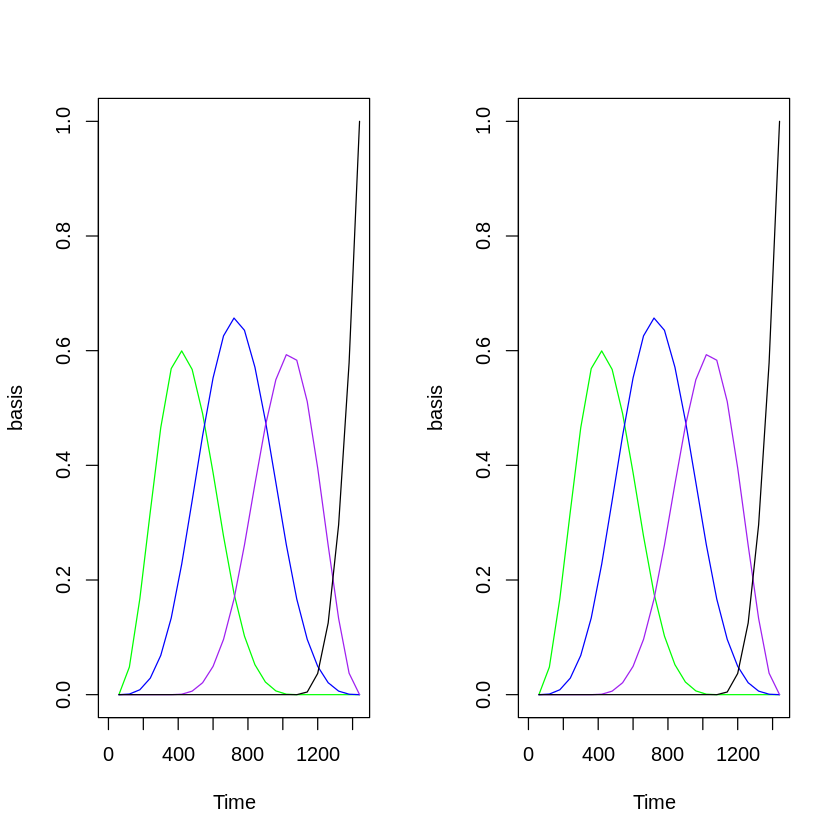

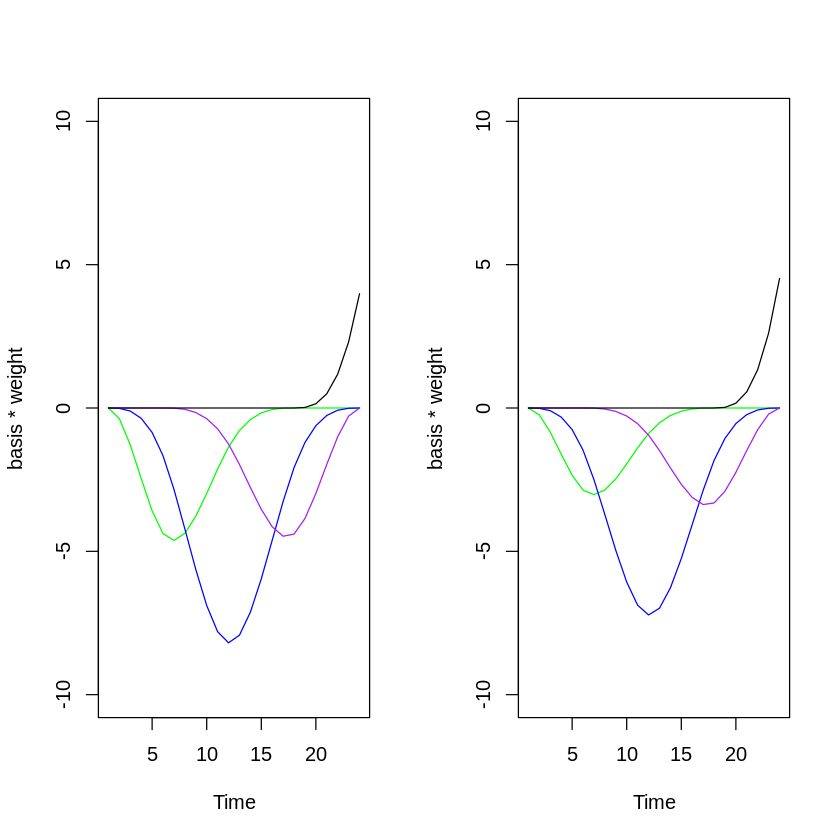

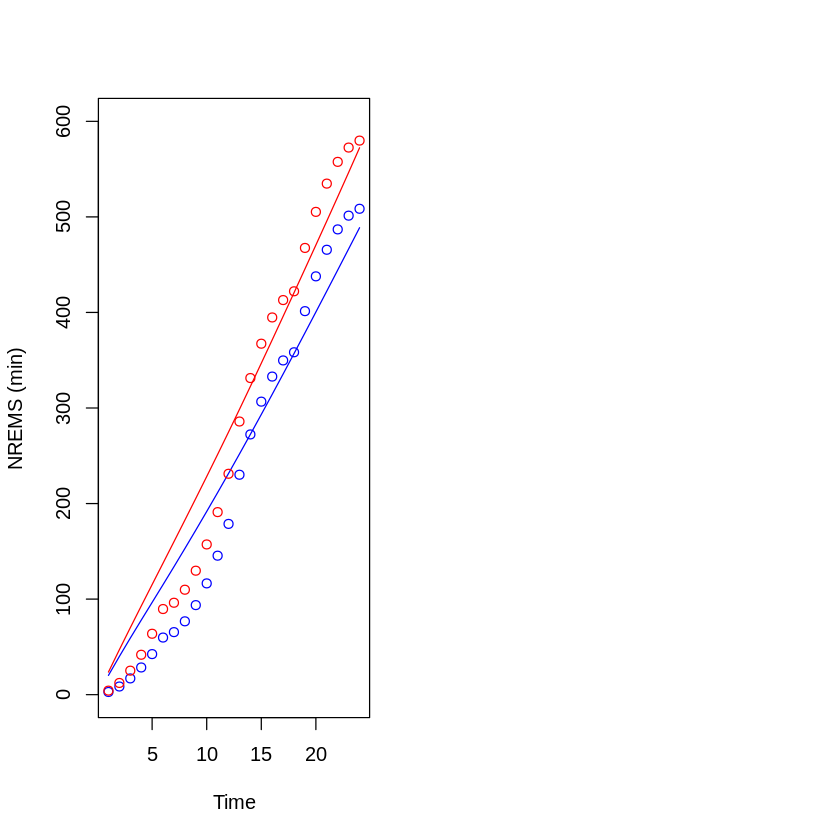

In [18]:
cols <- c("red", "yellow", "green", "blue", "purple", "orange", "black")
Bs <- c(3,4,5,7)

par(mfrow=c(1,2))
plot(NULL, xlim=c(0, 1440), ylim=c(0,1), xlab="Time", ylab="basis")
  for(i in Bs){
    lines(unique(Sleep_All$minute), B[,i], col=cols[i])
  }
plot(NULL, xlim=c(0, 1440), ylim=c(0,1), xlab="Time", ylab="basis")
  for(i in Bs){
    lines(unique(Sleep_All$minute), B[,i], col=cols[i])
  }

par(mfrow=c(1,2))
plot(B3*mean(post$w3[,1]), type="l", col=cols[3], ylim=c(-10,10), xlab="Time", ylab="basis * weight")
  lines(B4*mean(post$w4[,1]), col=cols[4])
  lines(B5*mean(post$w5[,1]), col=cols[5])
  lines(B7*mean(post$w7[,1]), col=cols[7])
plot(B3*mean(post$w3[,2]), type="l", col=cols[3], ylim=c(-10,10), xlab="Time", ylab="basis * weight")
  lines(B4*mean(post$w4[,2]), col=cols[4])
  lines(B5*mean(post$w5[,2]), col=cols[5])
  lines(B7*mean(post$w7[,2]), col=cols[7])

plot(colMeans(post$a_ctrl) +
     B3*mean(post$w3[,1]) +
     B4*mean(post$w4[,1]) +
     B5*mean(post$w5[,1]) +
     B7*mean(post$w7[,1]),
     col="blue", type="l", ylim=c(0, 600), xlab="Time", ylab="NREMS (min)")
lines(colMeans(post$a_trt) +
      B3*mean(post$w3[,2]) +
      B4*mean(post$w4[,2]) +
      B5*mean(post$w5[,2]) +
      B7*mean(post$w7[,2]), col="red")
points(colMeans(NREMS_A_cuml), col="blue")
points(colMeans(NREMS_B_cuml), col="red")


These splines don't seem to fit the data very well.  Let's try something different.

## Model 2

Recall that splines provide a set of *basis* values, and the model determines how to grow/shrink those value to best fit the data.  The problem with our last model was that these basis values were not great.  What if we used a similar method but used different basis values?

Recall that sleep occurs in cycles.  We can represent cycles over time with sine (or cosine) waves.  So let's use sine waves of different frequencies as our basis this time.

In [19]:
sine24 <- sin(2*pi/24*Sleep_All$Block)
sine12 <- sin(2*pi/12*Sleep_All$Block)
sine6 <- sin(2*pi/6*Sleep_All$Block)
sine3 <- sin(2*pi/3*Sleep_All$Block)
sine1_5 <- sin(2*pi/1.5*Sleep_All$Block)
sine0_75 <- sin(2*pi/0.75*Sleep_All$Block)

In [20]:
NREMS_model_2 <- quap(
  alist(
    NREMS ~ dnorm(mu, sigma),
      mu <- b_time[treatment]*time +
            b24[treatment]*sine24 +
            b12[treatment]*sine12 +
            b6[treatment]*sine6 +
            b3[treatment]*sine3 +
            b1_5[treatment]*sine1_5 +
            b0_75[treatment]*sine0_5,
              b_time[treatment] ~ dnorm(30, 10),
              b24[treatment] ~ dnorm(0, 20),
              b12[treatment] ~ dnorm(0, 20),
              b6[treatment] ~ dnorm(0, 20),
              b3[treatment] ~ dnorm(0, 20),
              b1_5[treatment] ~ dnorm(0, 20),
              b0_75[treatment] ~ dnorm(0, 20),
      sigma ~ dexp(1)
  ), data=list(NREMS=Sleep_All$NREMS,
               treatment=as.integer(Sleep_All$treatment)+1,
               time=Sleep_All$Block,
               TotalPreviousSleep=Sleep_All$TotalPreviousSleep,
               sine24=sine24, sine12=sine12, sine6=sine6, sine3=sine3, sine1_5=sine1_5, sine0_5=sine0_75)
)

precis(NREMS_model_2, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
b_time[1],18.6866815,0.1328927,18.474293,18.8990697
b_time[2],22.2878594,0.1328916,22.075473,22.5002457
b24[1],-59.8443617,2.6105069,-64.016456,-55.6722675
b24[2],-57.8845084,2.6104435,-62.056501,-53.7125155
b12[1],-4.5077328,2.4617315,-8.442055,-0.5734103
b12[2],-2.4920277,2.4617231,-6.426337,1.4422813
b6[1],-4.2690709,2.4233595,-8.142067,-0.3960744
b6[2],-3.1470483,2.4233567,-7.020040,0.7259437
b3[1],-0.4880387,16.3501460,-26.618730,25.6426525


In [21]:
post <- extract.samples(NREMS_model_2)
str(post)

List of 8
 $ sigma : num [1:10000] 28.4 26.8 26.8 26.2 27.8 ...
 $ b_time: num [1:10000, 1:2] 18.6 18.8 18.7 18.7 18.7 ...
 $ b24   : num [1:10000, 1:2] -61.3 -62.9 -57.5 -61 -57 ...
 $ b12   : num [1:10000, 1:2] -6.005 -3.185 -5.079 -2.389 -0.121 ...
 $ b6    : num [1:10000, 1:2] -3.978 -0.524 -4.339 -2.63 -4.685 ...
 $ b3    : num [1:10000, 1:2] -17.98 -21.55 -8.22 10.66 2.37 ...
 $ b1_5  : num [1:10000, 1:2] -18.98 -28.87 -5.89 -13.27 14.24 ...
 $ b0_75 : num [1:10000, 1:2] -2.49 -11.36 1.36 -26.81 15.7 ...
 - attr(*, "source")= chr "quap posterior: 10000 samples from NREMS_model_2"


In [22]:
time_seq <- 1:24
sine24_seq <- sin(2*pi/24*time_seq)
sine12_seq <- sin(2*pi/12*time_seq)
sine6_seq <- sin(2*pi/6*time_seq)
sine3_seq <- sin(2*pi/3*time_seq)
sine1.5_seq <- sin(2*pi/1.5*time_seq)
sine0.75_seq <- sin(2*pi/0.75*time_seq)

In [23]:
post$a_ctrl <- matrix(data=NA,
                      nrow=nrow(post$b_time),
                      ncol=m_NREMS)
post$a_trt <- matrix(data=NA,
                     nrow=nrow(post$b_time),
                     ncol=m_NREMS)
for(block in 1:m_NREMS){
  post$a_ctrl[,block] <- block * post$b_time[,1]
  post$a_trt[,block] <- block * post$b_time[,2]
}

In [24]:
post$NREMSA24 <- post$b24[,1] %*% t(sine24_seq)
post$NREMSA12 <- post$b12[,1] %*% t(sine12_seq)
post$NREMSA6 <- post$b6[,1] %*% t(sine6_seq)
post$NREMSA3 <- post$b3[,1] %*% t(sine3_seq)
post$NREMSA1.5 <- post$b1_5[,1] %*% t(sine1.5_seq)
post$NREMSA0.75 <- post$b0_75[,1] %*% t(sine0.75_seq)

post$NREMSB24 <- post$b24[,2] %*% t(sine24_seq)
post$NREMSB12 <- post$b12[,2] %*% t(sine12_seq)
post$NREMSB6 <- post$b6[,2] %*% t(sine6_seq)
post$NREMSB3 <- post$b3[,2] %*% t(sine3_seq)
post$NREMSB1.5 <- post$b1_5[,2] %*% t(sine1.5_seq)
post$NREMSB0.75 <- post$b0_75[,2] %*% t(sine0.75_seq)

In [25]:
post$NREMS_A <- with(post,
                      a_ctrl +
                      NREMSA24 +
                      NREMSA12 +
                      NREMSA6 +
                      NREMSA3 +
                      NREMSA1.5 +
                      NREMSA0.75)
post$NREMS_A_mean <- colMeans(post$NREMS_A)
post$NREMS_A_CrI <- apply(post$NREMS_A, 2, HPDI, 0.95)

post$NREMS_B <- with(post,
                      a_trt +
                      NREMSB24 +
                      NREMSB12 +
                      NREMSB6 +
                      NREMSB3 +
                      NREMSB1.5 +
                      NREMSB0.75)
post$NREMS_B_mean <- colMeans(post$NREMS_B)
post$NREMS_B_CrI <- apply(post$NREMS_B, 2, HPDI, 0.95)

str(post)

List of 28
 $ sigma       : num [1:10000] 28.4 26.8 26.8 26.2 27.8 ...
 $ b_time      : num [1:10000, 1:2] 18.6 18.8 18.7 18.7 18.7 ...
 $ b24         : num [1:10000, 1:2] -61.3 -62.9 -57.5 -61 -57 ...
 $ b12         : num [1:10000, 1:2] -6.005 -3.185 -5.079 -2.389 -0.121 ...
 $ b6          : num [1:10000, 1:2] -3.978 -0.524 -4.339 -2.63 -4.685 ...
 $ b3          : num [1:10000, 1:2] -17.98 -21.55 -8.22 10.66 2.37 ...
 $ b1_5        : num [1:10000, 1:2] -18.98 -28.87 -5.89 -13.27 14.24 ...
 $ b0_75       : num [1:10000, 1:2] -2.49 -11.36 1.36 -26.81 15.7 ...
 $ a_ctrl      : num [1:10000, 1:24] 18.6 18.8 18.7 18.7 18.7 ...
 $ a_trt       : num [1:10000, 1:24] 22.2 22.3 22.2 22.2 22.4 ...
 $ NREMSA24    : num [1:10000, 1:24] -15.9 -16.3 -14.9 -15.8 -14.7 ...
 $ NREMSA12    : num [1:10000, 1:24] -3.0023 -1.5925 -2.5396 -1.1946 -0.0605 ...
 $ NREMSA6     : num [1:10000, 1:24] -3.445 -0.454 -3.758 -2.277 -4.058 ...
 $ NREMSA3     : num [1:10000, 1:24] -15.57 -18.67 -7.12 9.23 2.05 ...
 $ N

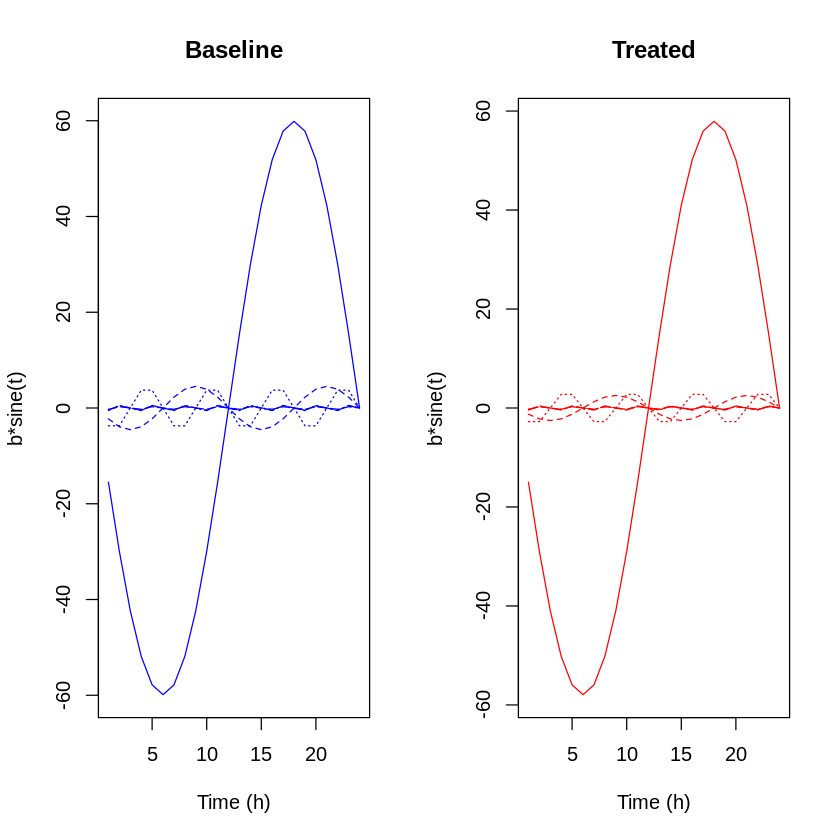

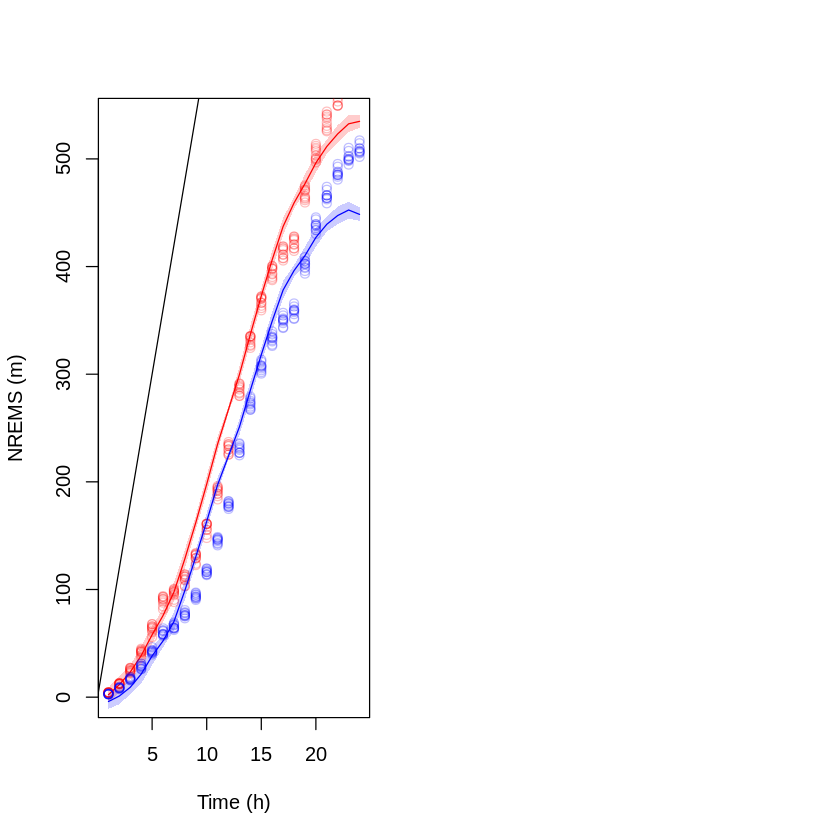

In [26]:
par(mfrow=c(1,2))
plot(mean(post$b24[,1])*sine24_seq, type="l", xlab="Time (h)", ylab="b*sine(t)", main = "Baseline", col="blue")
lines(mean(post$b12[,1])*sine12_seq, lty=2, col="blue")
lines(mean(post$b6[,1])*sine6_seq, lty=3, col="blue")
lines(mean(post$b3[,1])*sine3_seq, lty=4, col="blue")
lines(mean(post$b1_5[,1])*sine1.5_seq, lty=5, col="blue")
lines(mean(post$b0_75[,1])*sine0.75_seq, lty=5, col="blue")

plot(mean(post$b24[,2])*sine24_seq, type="l", xlab="Time (h)", ylab="b*sine(t)", main = "Treated", col="red")
lines(mean(post$b12[,2])*sine12_seq, lty=2, col="red")
lines(mean(post$b6[,2])*sine6_seq, lty=3, col="red")
lines(mean(post$b3[,2])*sine3_seq, lty=4, col="red")
lines(mean(post$b1_5[,2])*sine1.5_seq, lty=5, col="red")
lines(mean(post$b0_75[,2])*sine0.75_seq, lty=5, col="red")


plot(colMeans(post$NREMS_B), type="l", col="red", xlab="Time (h)", ylab="NREMS (m)")
  shade(post$NREMS_B_CrI, time_seq, col=col.alpha("red", 0.2))
  points(Sleep_All[Sleep_All$treatment==TRUE, "NREMS"] ~ Sleep_All[Sleep_All$treatment==TRUE, "Block"], col=col.alpha("red", 0.25))
lines(colMeans(post$NREMS_A), col="blue")
  shade(post$NREMS_A_CrI, time_seq, col=col.alpha("blue", 0.2))
  points(Sleep_All[Sleep_All$treatment==FALSE, "NREMS"] ~ Sleep_All[Sleep_All$treatment==FALSE, "Block"], col=col.alpha("blue", 0.25))
abline(a=0, b=1440/24)

In [27]:
t1 <- 2
t2 <- 7

mean(rowSums(with(post,
             NREMS_B[,t1:t2] - NREMS_A[, t1:t2])))

sd(rowSums(with(post,
             NREMS_B[,t1:t2] - NREMS_A[, t1:t2])))

[1] 112.4449

[1] 24.07464

### Model 1 vs Model 2 Comparison
So we have 2 models here.  Neither is perfect, but we've seen that `NREMS_model_2` fits the data better, at least using the eyeball test.

We can formalize this intuition.  It may not seem critical to do so in this case, since one model looks so much better than the other, but closer cases would merit this type of formal comparison.

We can compare these models using WAIC or PSIS.  You can learn more about these measures in Ch 7. of [Statistical Rethinking](https://www.amazon.com/Statistical-Rethinking-Bayesian-Examples-Chapman/dp/036713991X/ref=pd_lpo_sccl_1/145-9439961-9588004?pd_rd_w=PYeSr&content-id=amzn1.sym.1ad2066f-97d2-4731-9356-36b3edf1ae04&pf_rd_p=1ad2066f-97d2-4731-9356-36b3edf1ae04&pf_rd_r=03APQFHXPVGQYH3P0MJX&pd_rd_wg=9RWdT&pd_rd_r=0cd1b958-ef4e-4987-a0cd-95ca786ce1b6&pd_rd_i=036713991X&psc=1), or you can check out [my solutions to the the end-of-chapter questions for it](https://colab.research.google.com/drive/1EcTeDcSudJX3BJhc3SYxc56NSJelqeyk?usp=sharing).  For now, just know that WAIC and PSIS are two ways of measuring the magnitude of error a model is expected to make on new data.  Models that are expected to make less error are probably doing a better job of extracting meaningful signal from the data.

A few nuances here.  
1.   WAIC and PSIS only address models' predictive capacity.  This means that they cannot tell you if the assumptions of your model are valid.
2.   WAIC and PSIS are only scores.  There's no such thing as *high* or *low* scores in an absolute sense.  Instead, models can have higher or lower scores than one another.  If (and only if) those models were trained on the same data, we can use the scores to compare the predictive capcity of each model.



In [28]:
round(compare(NREMS_model_1, NREMS_model_2, func=WAIC),2)
round(compare(NREMS_model_1, NREMS_model_2, func=PSIS),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NREMS_model_2,4560.12,28.83,0.00,NA,9.74,1
NREMS_model_1,5053.04,23.95,492.93,32.12,5.67,0


,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NREMS_model_2,4559.98,28.73,0.00,NA,9.58,1
NREMS_model_1,5053.31,24.00,493.33,32.11,5.76,0


The message is clear using either message; as we suspected `NREMS_model_2` seems to fit the data better than `NREMS_model_1`.  We see this in several ways.  First, the WAIC and PSIS scores for `NREMS_model_2` are lower than those for `NREMS_model_1`.  Further, the `compare` functions assign 100% of the `weight` to `NREMS_model_2`.  Think of the `weight` like this.  If we were going to combine the predictions of both models to predict new data, we'd discard the predictions of `NREMS_model_1` completely and only rely on `NREMS_model_2`.

### How many waveforms

In our models so far, we've used 7 sine waves to capture the dynamics of NREMS.  Is this enough?  Too many?  How could we decide?

Primarily, we should use background knowledge to guide us.  But even then, background knowledge can be imprecise, inaccurate, or uncertain.  In these cases, we can use the same model-comparison tools to determine which/how many waveforms are most appropriate.

Here, let's rerun Model 2, but with fewer waveforms, then compare.

In [37]:
NREMS_model_2b <- quap(
  alist(
    NREMS ~ dnorm(mu, sigma),
      mu <- b_time[treatment]*time +
            b24[treatment]*sine24 +
            b12[treatment]*sine12 +
            b6[treatment]*sine6,
              b_time[treatment] ~ dnorm(30, 10),
              b24[treatment] ~ dnorm(0, 20),
              b12[treatment] ~ dnorm(0, 20),
              b6[treatment] ~ dnorm(0, 20),
      sigma ~ dexp(1)
  ), data=list(NREMS=Sleep_All$NREMS,
               treatment=as.integer(Sleep_All$treatment)+1,
               time=Sleep_All$Block,
               TotalPreviousSleep=Sleep_All$TotalPreviousSleep,
               sine24=sine24, sine12=sine12, sine6=sine6, sine3=sine3, sine1_5=sine1_5, sine0_5=sine0_75)
)

In [38]:
round(compare(NREMS_model_2, NREMS_model_2b, func=WAIC),2)
round(compare(NREMS_model_2, NREMS_model_2b, func=PSIS),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NREMS_model_2b,4557.37,28.75,0.00,NA,8.25,0.87
NREMS_model_2,4561.12,28.91,3.75,1.48,10.33,0.13


,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NREMS_model_2b,4556.91,28.63,0.00,NA,8.00,0.77
NREMS_model_2,4559.35,28.59,2.44,1.5,9.35,0.23


Interestingly, fewer waveforms performed better.  We could repeat this for any number of waveforms.  I'm going to retain the waveforms from model 2B going forward.

## Ensuring positivity

To this point, we've modeled NREMS as a normal distribution.  This is probably fine, but there is one concern: the normal distribution permits negative values, but there is no such thing as negative NREMS.  This probably doesn't make a big difference since we're using cumulative NREMS (hence, the mean value quickly becomes so great that there the implied probability of negative NREMS is basically 0), but it might be worth trying to fix this.

One way to fix this is to model NREMS as a positive-continuous variable: either an exponential or gamma distribution.  We can do this with a small switch from `NREMS ~ dnorm(mu, sigma)` to `NREMS ~ dgamma2(mu, scale)` or `NREMS ~ dexp(lambda)'.  This will allow us to then interpret the posterior in terms of NREMS, but we'll have to do a bit more post-processing.  Alternatively, we can set a constrainst to ensure that the linear time component, `b_time`, is always positive.  That's the approach we'll take here; this will require we switch from the `quap()` function to the `ulam()` function.

### Model 3

In [29]:
sine24 <- sin(2*pi/24*Sleep_All$Block)
sine12 <- sin(2*pi/12*Sleep_All$Block)
sine6 <- sin(2*pi/6*Sleep_All$Block)
sine3 <- sin(2*pi/3*Sleep_All$Block)
sine1_5 <- sin(2*pi/1.5*Sleep_All$Block)
sine0_75 <- sin(2*pi/0.75*Sleep_All$Block)

In [39]:
NREMS_model_3 <- ulam(
  alist(
    NREMS ~ dnorm(mu, sigma),
      mu <- b_time[treatment]*time +
            b24[treatment]*sine24 +
            b12[treatment]*sine12 +
            b6[treatment]*sine6,
              b_time[treatment] ~ dnorm(30, 10),
              b24[treatment] ~ dnorm(0, 20),
              b12[treatment] ~ dnorm(0, 20),
              b6[treatment] ~ dnorm(0, 20),
      sigma ~ dexp(1)
  ), data=list(NREMS=Sleep_All$NREMS,
               treatment=as.integer(Sleep_All$treatment)+1,
               time=Sleep_All$Block,
               TotalPreviousSleep=Sleep_All$TotalPreviousSleep,
               sine24=sine24, sine12=sine12, sine6=sine6, sine3=sine3, sine1_5=sine1_5, sine0_5=sine0_75),
     constraints=list(b_time="lower=0"),
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

precis(NREMS_model_3, 2)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warnin

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warnin

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warnin

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/RtmpdYT4HS/model-1a8363e9d1c.stan', line 30, column 4 to column 33)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warnin

Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
b_time[1],18.687777,0.1271628,18.482789,18.8876000,0.9995170,2549.161
b_time[2],22.293685,0.1326513,22.085800,22.5149220,1.0022904,2280.878
b24[1],-59.846677,2.5680263,-63.916399,-55.7749450,1.0019240,1903.061
b24[2],-57.765088,2.6692499,-62.121172,-53.5365075,0.9997857,1734.766
b12[1],-4.510742,2.4804576,-8.290098,-0.4985688,1.0017500,2375.762
b12[2],-2.405866,2.4696885,-6.413484,1.3619744,1.0008195,2161.211
b6[1],-4.264897,2.4420277,-8.237186,-0.2811537,1.0015021,1741.085
b6[2],-3.110151,2.5422956,-7.062474,0.9022415,1.0004348,1878.855
sigma,26.880584,0.8506596,25.563333,28.2341235,0.9989069,2741.844


## Incorporating REMS

To this point, we've only included NREMS.  But we also need REMS to fully capture sleep.  As a first approach, we might simply add an additional model for REMS that parallels the model for NREMS.

### Model 4

In [40]:
S_model_4 <- ulam(
  alist(
    NREMS ~ dnorm(muN, sigmaN),
      muN <- N_time[treatment]*time +
            N24[treatment]*sine24 +
            N12[treatment]*sine12 +
            N6[treatment]*sine6,
              N_time[treatment] ~ dnorm(30, 10),
              N24[treatment] ~ dnorm(0, 20),
              N12[treatment] ~ dnorm(0, 20),
              N6[treatment] ~ dnorm(0, 20),
      sigmaN ~ dexp(1),

    REMS ~ dnorm(muR, sigmaR),
      muR <- R_time[treatment]*time +
             R24[treatment]*sine24 +
             R12[treatment]*sine12 +
             R6[treatment]*sine6,
               R_time[treatment] ~ dnorm(10, 5),
               R24[treatment] ~ dnorm(0, 10),
               R12[treatment] ~ dnorm(0, 10),
               R6[treatment] ~ dnorm(0, 10),
       sigmaR ~ dexp(1)
  ), data=list(NREMS=Sleep_All$NREMS,
               REMS=Sleep_All$REMS,
               treatment=as.integer(Sleep_All$treatment)+1,
               time=Sleep_All$Block,
               TotalPreviousSleep=Sleep_All$TotalPreviousSleep,
               sine24=sine24, sine12=sine12, sine6=sine6, sine3=sine3, sine1_5=sine1_5, sine0_5=sine0_75),
     constraints=list(b_time="lower=0"),
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

precis(S_model_4, depth=2)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration:

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N_time[1],18.686355,0.13363267,18.473100,18.8952760,1.0054821,2529.520
N_time[2],22.289158,0.13416303,22.065678,22.5014110,1.0006047,2546.275
N24[1],-59.881264,2.60169568,-64.130528,-55.8938545,1.0001355,2874.918
N24[2],-57.837916,2.61577871,-62.119669,-53.7682900,0.9987761,2871.605
N12[1],-4.575603,2.50957739,-8.563599,-0.6380260,1.0053389,3157.218
N12[2],-2.459777,2.48305729,-6.486761,1.4490850,1.0013783,3115.005
N6[1],-4.229703,2.38794536,-8.000588,-0.5295448,1.0065589,2882.004
N6[2],-3.181142,2.53503158,-7.176961,0.8323668,1.0050521,2930.346
sigmaN,26.920686,0.85302787,25.585692,28.3069575,1.0139566,3096.653


But this is suboptimal because NREMS and REMS are related.  For one, time spent in one precludes time spent in the other.  For two, NREMS and REMS are aspects of a complex physiological phenomenon that, we should assume, causes relations between them.  It would be nice to capture, at least some of, this relatedness.

One way we might try to do this is to wrap all of the parameters into a multivariate distribution.  

### Model 5

Here, we'll wrap "*like*" parameters together into several multi-variate distributions.

In [43]:
S_model_5 <- ulam(
  alist(
    NREMS ~ dnorm(muN, sigmaN),
      muN <- N_time[treatment]*time +
            N24[treatment]*sine24 +
            N12[treatment]*sine12 +
            N6[treatment]*sine6,
    REMS ~ dnorm(muR, sigmaR),
      muR <- R_time[treatment]*time +
             R24[treatment]*sine24 +
             R12[treatment]*sine12 +
             R6[treatment]*sine6,

        c(N_time, R_time)[treatment] ~ multi_normal(c(30,10), RHO_time, SIGMA_time),
          RHO_time ~ lkj_corr(2),
          SIGMA_time ~ dexp(0.25),
        c(N24, R24)[treatment] ~ multi_normal(c(0,0), RHO_24, SIGMA_24),
          RHO_24 ~ lkj_corr(2),
          SIGMA_24 ~ dexp(1),
        c(N12, R12)[treatment] ~ multi_normal(c(0,0), RHO_12, SIGMA_12),
          RHO_12 ~ lkj_corr(2),
          SIGMA_12 ~ dexp(1),
        c(N6, R6)[treatment] ~ multi_normal(c(0,0), RHO_6, SIGMA_6),
          RHO_6 ~ lkj_corr(2),
          SIGMA_6 ~ dexp(1),
      sigmaN ~ dexp(1),
      sigmaR ~ dexp(1)
  ), data=list(NREMS=Sleep_All$NREMS,
               REMS=Sleep_All$REMS,
               treatment=as.integer(Sleep_All$treatment)+1,
               time=Sleep_All$Block,
               TotalPreviousSleep=Sleep_All$TotalPreviousSleep,
               sine24=sine24, sine12=sine12, sine6=sine6, sine3=sine3, sine1_5=sine1_5, sine0_5=sine0_75),
     constraints=list(b_time="lower=0"),
     chains=4,
     cores=4,
     iter=2000,
     log_lik=TRUE
)

precis(S_model_5, depth=3)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 49, column 4 to column 27)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 49, column 4 to column 27)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occu

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 67, column 4 to column 29)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = -8.30509e+09, but Covariance matrix[2,1] = -8.30509e+09 (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 55, column 4 to column 64)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like cova

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = 2.11005e+15, but Covariance matrix[2,1] = 2.11005e+15 (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 73, column 4 to column 68)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 40, column 4 to column 26)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = 2.63618e+17, but Covariance matrix[2,1] = 2.63618e+17 (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 55, column 4 to column 64)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 58, column 4 to column 27)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = -5.67932e+24, but Covariance matrix[2,1] = -5.67932e+24 (in '/tmp/RtmpdYT4HS/model-1a87c8ceaa7.stan', line 46, column 4 to column 62)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  

See https://mc-stan.org/misc/warnings for details.




,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R_time[1],2.1764791,0.03286110,2.1226650,2.22882055,0.9995126,4539.1785
R_time[2],2.1227171,0.03334026,2.0688334,2.17582595,1.0003706,4265.6293
N_time[1],18.7453037,0.13203607,18.5363945,18.95541100,1.0014154,4667.9830
N_time[2],22.3241141,0.13058329,22.1143450,22.53023300,1.0000243,4351.4231
"RHO_time[1,1]",1.0000000,0.00000000,1.0000000,1.00000000,NA,NA
"RHO_time[2,1]",0.4454855,0.33075836,-0.1592943,0.88121847,1.0011492,3714.7142
"RHO_time[1,2]",0.4454855,0.33075836,-0.1592943,0.88121847,1.0011492,3714.7142
"RHO_time[2,2]",1.0000000,0.00000000,1.0000000,1.00000000,NA,NA
SIGMA_time[1],8.2792839,3.12680661,4.7220533,14.00873200,1.0012612,4077.9809


### Model 6

Now, we'll put all waveforms into a single multivariate distribution.

In [47]:
S_model_6 <- ulam(
  alist(
    NREMS ~ dnorm(muN, sigmaN),
      muN <- N_time[treatment]*time +
            N24[treatment]*sine24 +
            N12[treatment]*sine12 +
            N6[treatment]*sine6,
    REMS ~ dnorm(muR, sigmaR),
      muR <- R_time[treatment]*time +
             R24[treatment]*sine24 +
             R12[treatment]*sine12 +
             R6[treatment]*sine6,

        c(N_time, R_time,
          N24, R24,
          N12, R12,
          N6, R6)[treatment] ~ multi_normal(c(30,10,0,0,0,0,0,0), RHO, SIGMA),
          RHO ~ lkj_corr(2),
          SIGMA ~ dexp(0.25),
      sigmaN ~ dexp(1),
      sigmaR ~ dexp(1)
  ), data=list(NREMS=Sleep_All$NREMS,
               REMS=Sleep_All$REMS,
               treatment=as.integer(Sleep_All$treatment)+1,
               time=Sleep_All$Block,
               TotalPreviousSleep=Sleep_All$TotalPreviousSleep,
               sine24=sine24, sine12=sine12, sine6=sine6, sine3=sine3, sine1_5=sine1_5, sine0_5=sine0_75),
     constraints=list(b_time="lower=0"),
     chains=4,
     cores=4,
     iter=2000,
     log_lik=TRUE
)

precis(S_model_5, depth=3)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occu

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occu

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occu

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 34, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occu

Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[3,7] = 8.414e+08, but Covariance matrix[7,3] = 8.414e+08 (in '/tmp/RtmpdYT4HS/model-1a81918b2f5.stan', line 40, column 4 to column 58)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 


See https://mc-stan.org/misc/warnings for details.




,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R_time[1],2.1764791,0.03286110,2.1226650,2.22882055,0.9995126,4539.1785
R_time[2],2.1227171,0.03334026,2.0688334,2.17582595,1.0003706,4265.6293
N_time[1],18.7453037,0.13203607,18.5363945,18.95541100,1.0014154,4667.9830
N_time[2],22.3241141,0.13058329,22.1143450,22.53023300,1.0000243,4351.4231
"RHO_time[1,1]",1.0000000,0.00000000,1.0000000,1.00000000,NA,NA
"RHO_time[2,1]",0.4454855,0.33075836,-0.1592943,0.88121847,1.0011492,3714.7142
"RHO_time[1,2]",0.4454855,0.33075836,-0.1592943,0.88121847,1.0011492,3714.7142
"RHO_time[2,2]",1.0000000,0.00000000,1.0000000,1.00000000,NA,NA
SIGMA_time[1],8.2792839,3.12680661,4.7220533,14.00873200,1.0012612,4077.9809


#### Comparing models

In [48]:
round(compare(S_model_4, S_model_5, S_model_6, func=WAIC),2)
round(compare(S_model_4, S_model_5, S_model_6, func=PSIS),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S_model_6,4555.80,27.54,0.00,NA,7.14,0.44
S_model_4,4556.13,28.08,0.34,2.55,7.72,0.37
S_model_5,4557.47,27.22,1.67,2.27,6.12,0.19


,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S_model_6,4555.82,27.57,0.00,NA,7.15,0.44
S_model_4,4556.19,28.11,0.36,2.55,7.75,0.37
S_model_5,4557.50,27.25,1.67,2.27,6.13,0.19


Somewhat expectedly, the all-in-one Model 6 does best.

Now let's build out the posterior for Model 6.

### Model 6 Posterior

(If you're reading this, know there is more to come here.  I am adding to this in conjuction with another project: [video solutions](https://youtube.com/playlist?list=PL4OalocKlC1R5dZCaD9AHP96Uwkl0Xv0R&si=lQ8bXiuT_iL-XbZC) to the Practice problems from the text book "Statistical Rethinking".  As relevant concepts arise there, I will incorporate them here.)